In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pyproj
from shapely.ops import transform
from functools import partial

pd.set_option('display.max_columns', 999)

# Initial data loading

In [3]:
# Read data, filter out users with fewer than 20 tweets
df = pd.read_csv('data/ba_2012.csv')
df = df.groupby('u_id').filter(lambda group: len(group) > 20)

# Create a shapely.geometry.Point for each tweet
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init' :'epsg:4326'}

# Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

print(df.shape)
df.head()

/mnt/c/Users/Junseo/Documents/data-science/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3179840, 18)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry
0,227552828854517761,286204686,-34.615267,-58.838874,1343087796000,ll,NaN,1303484737000,766,Orgullosamente Arshentina,es,1603,River+Jonas=My♥,ayelenjonass,Soy ayelen soy jonatica fan @jonasbrothers @dd...,NaN,Un hombre tiene la razón hasta que se demuestr...,POINT (-58.8388738 -34.615267)
1,227553127031783425,290364810,-34.421520,-58.726667,1343087867000,ll,NaN,1304139296000,59,NaN,es,1466,yami suarez,yamii_suarez,NaN,NaN,No me contestes :/,POINT (-58.72666700000001 -34.4215196)
2,227553906417356800,175518563,-34.622320,-58.477805,1343088053000,ll,NaN,1281127957000,387,NaN,es,3912,Luli Zuluaga,lulizuluaga,Dance dance dance,NaN,Tengo los ovarios inflados de todo el mundo po...,POINT (-58.477805 -34.62232)
3,227554340624289792,380116374,-34.595126,-58.399522,1343088157000,ll,NaN,1317006394000,226,Donde me lleve el MetroBus,es,7029,Lana Del Rey,cupiidboy,Who has the face like smarty does?\r\nWho has ...,NaN,@DavidKino te dije q no hables de mi a mis esp...,POINT (-58.3995218 -34.5951265)
6,227556228316921857,565643717,-34.763922,-58.396396,1343088607000,ll,NaN,1335637794000,49,NaN,es,935,pepa 7,martin_peter7,esperando q banfield vuelva a su lugar ...\r\n,NaN,@kevinradics1 jajaja no lloro pero me la pusis...,POINT (-58.3963963 -34.7639223)


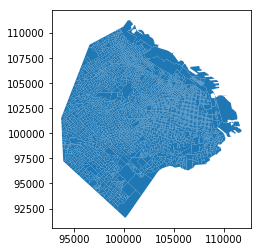

In [4]:
# Read Buenos Aires shapefiles
ba_shapefiles = gpd.read_file("shapefiles/radio_barrio_census_2010.shp")

# Note the coordinate system is not lat/lon
ba_shapefiles.plot();

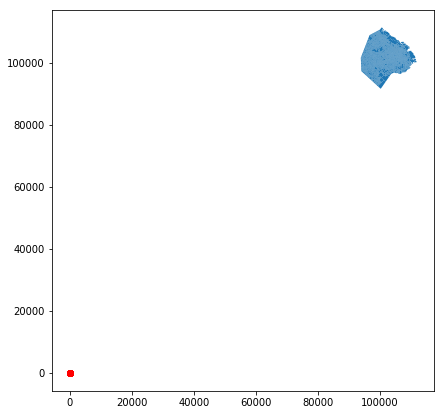

In [5]:
# Thus when we plot a sample of points, they are on different CRS projections
gsample = gdf.sample(n=10000, random_state=42)

fig, ax = plt.subplots(figsize=(10, 7))
ba_shapefiles['geometry'].plot(ax=ax)
gsample.plot(ax=ax, marker='o', color='red', alpha=0.05);

# Converting shapefile CRS

In [6]:
def convert_shapefile_crs(shapefile):
    """
    Convert shapefile CRS to WGS84 (epsg:4326).
    Function may take a while to run.
    
    Parameters
    ----------
    shapefile : geopandas.GeoDataFrame
    
    Returns
    -------
    shapefile : geopandas.GeoDataFrame
        Contains updated 'geometry' column
    """
    in_proj = pyproj.Proj(shapefile.crs)
    out_proj = pyproj.Proj(init='epsg:4326')
    
    project = partial(
        pyproj.transform,
        in_proj,
        out_proj
    )
    shapefile['geometry'] = [transform(project, geom) for geom in shapefile['geometry']]
    
    return shapefile

In [7]:
ba_shapefiles = convert_shapefile_crs(ba_shapefiles)

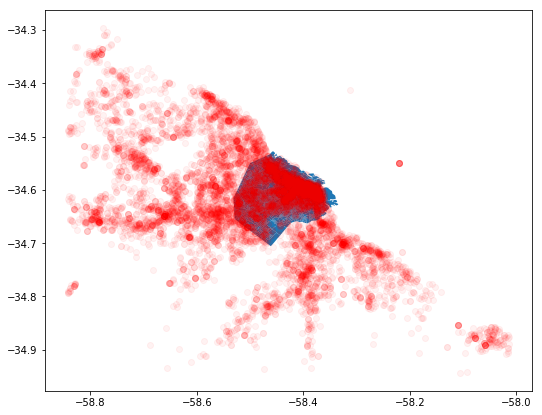

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))
ba_shapefiles['geometry'].plot(ax=ax)
gsample.plot(ax=ax, marker='o', color='red', alpha=0.05);